In [1]:
from HTC import HTC
from HTC_plot import plotHTC

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plotter = plotHTC()

Init plotter


In [3]:
folder = 'results/connectome/'
mod = HTC.loadFromName(folder+'connectome_66_0.0_1.5_0.01_50_0.73_0')

CREATED Network=connectome, N=66, id=0 ...



Per tre valori dell'order parameter ($T<T_c$, $T=T_c$, $T>T_c$), ho plottato:
- uno sketch della time series del valore medio di attivazione
- uno sketch della time series del valore medio di attivazione per la rete normalizzata
- Power spectrum dell'attivazione
- Autocorrelation function

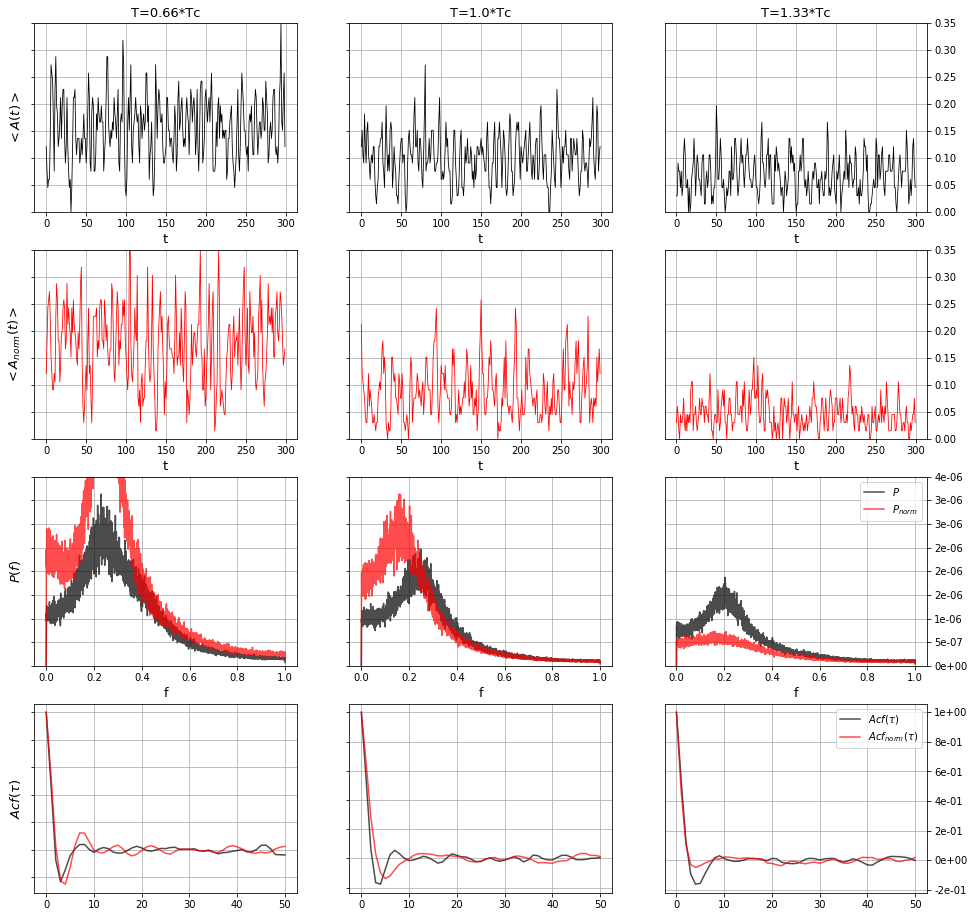

In [4]:
plotter.plot_series(mod, y_lim=[0,0.35], N=300)

Di seguito invece ho plottato (per la rete originiale e normalizzata) al variare del parametro di soglia:
- Activity
- First and second cluster size
- Correlazione tra i nodi

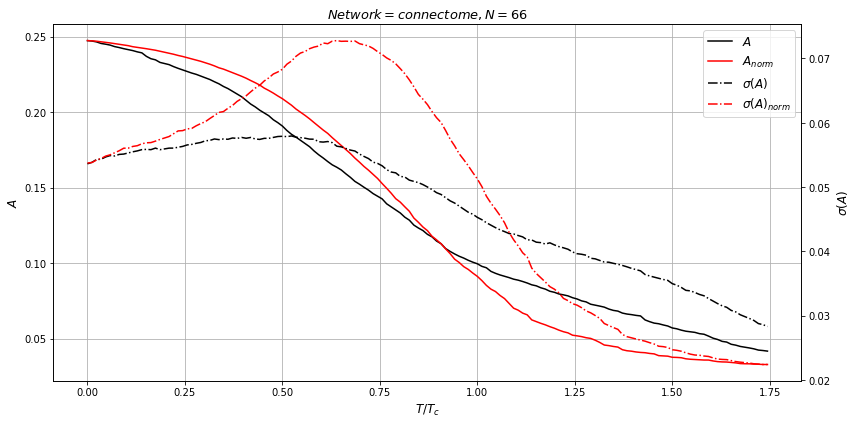

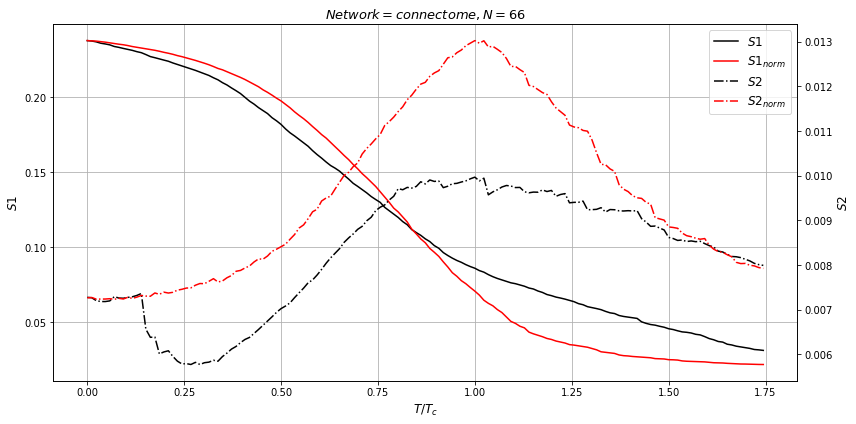

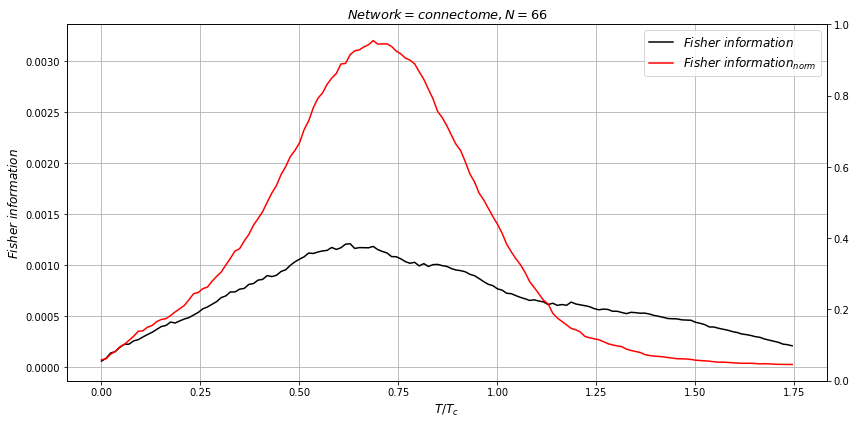

In [5]:
plotter.plot_variable(mod, 'act')
plotter.plot_variable(mod, 'cluster')
plotter.plot_variable(mod, 'fisher')

# Pdf cluster size

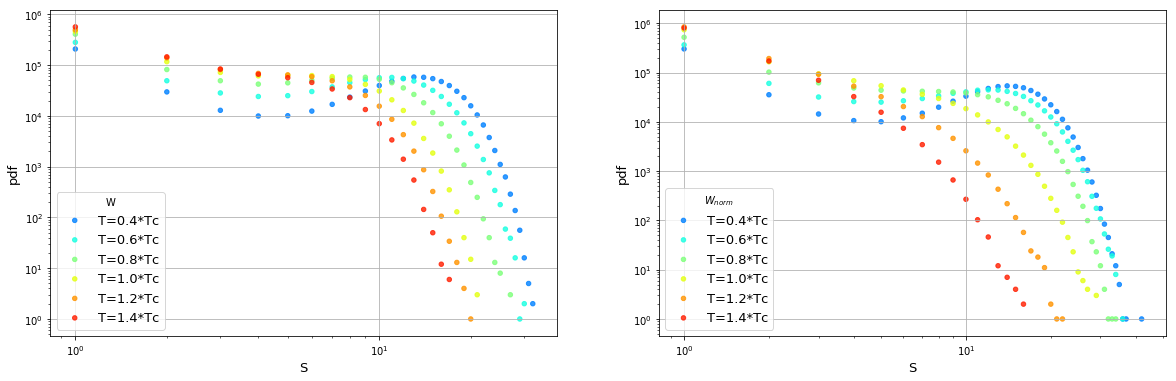

In [6]:
plotter.plot_pdf(mod, 'cluster')

# Pdf interevent time

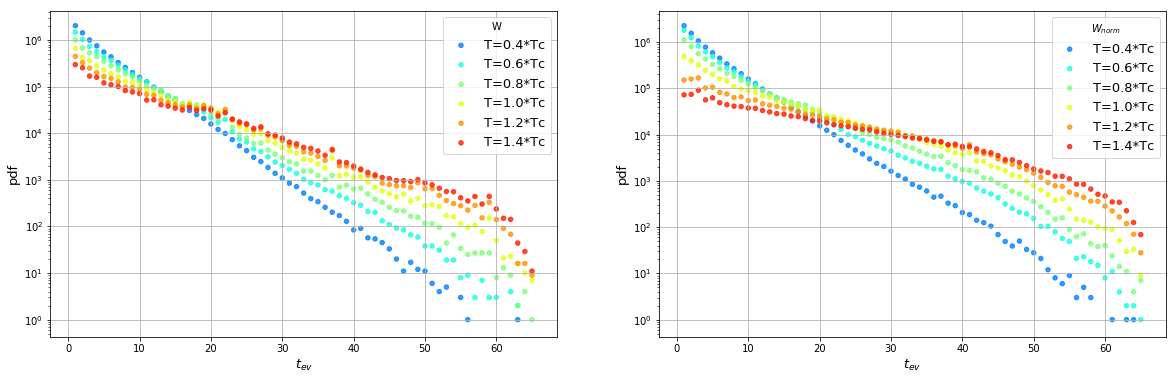

In [7]:
plotter.plot_pdf(mod, 'ev', scale='log')

# Pdf avalanches

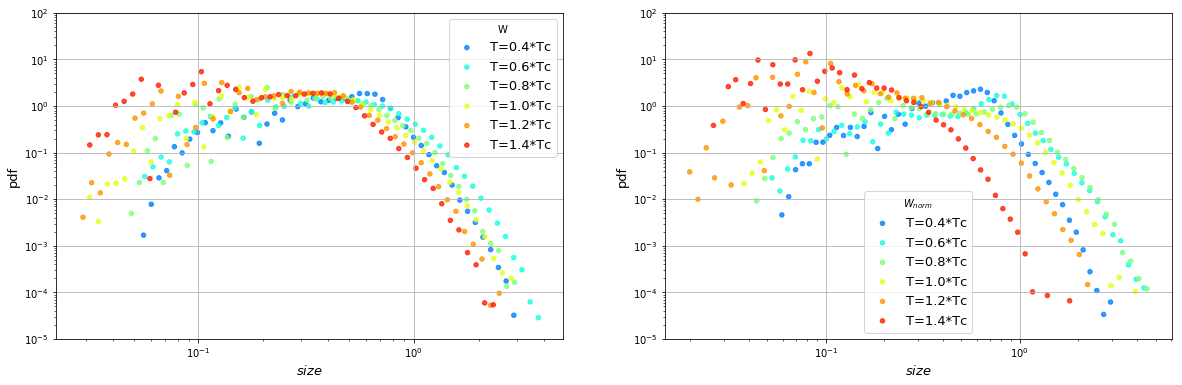

In [8]:
plotter.plot_pdf(mod, 'size', Nbins=None, yrange=[1e-5, 1e2], scale='loglog')

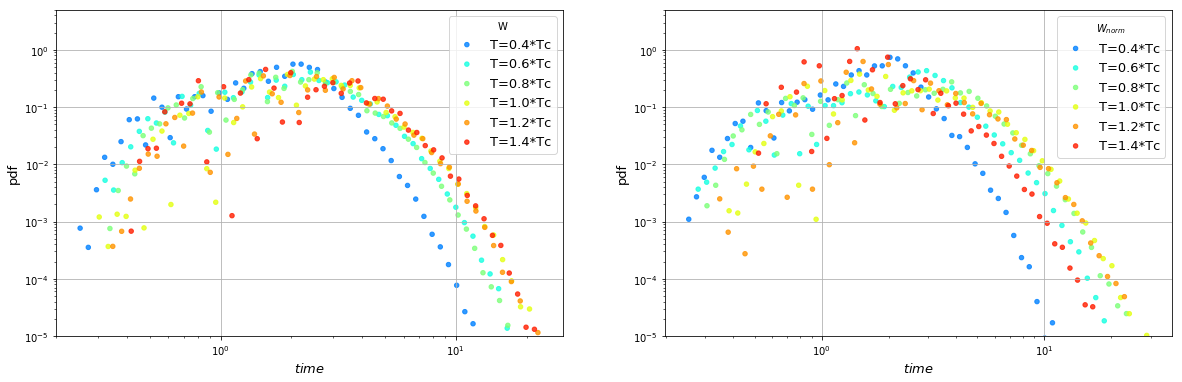

In [9]:
plotter.plot_pdf(mod, 'time', Nbins=None, yrange=[1e-5, 5], scale='loglog')

# Pdf causal avalanches

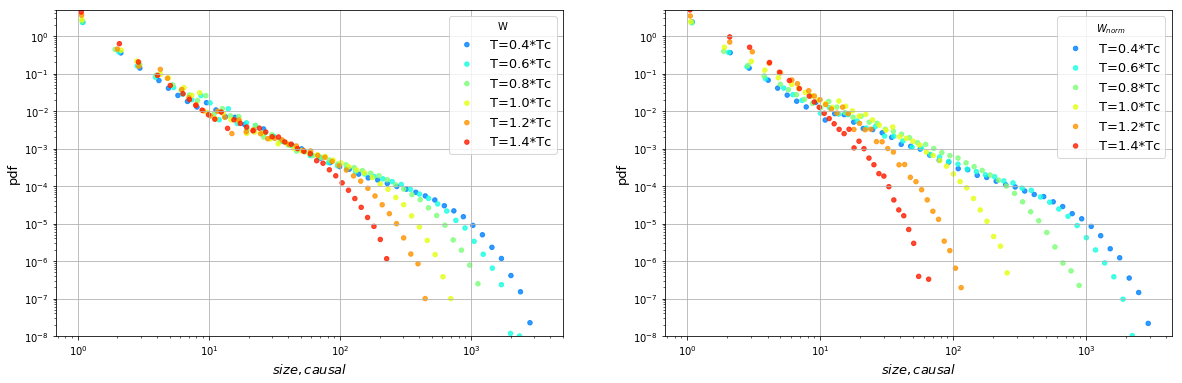

In [7]:
plotter.plot_pdf(mod, 'size_causal', Nbins=None, yrange=[1e-8, 5], scale='loglog')

-1.9124684985755105 0.1446328409049534
-1.78426001356189 0.17787140429495138


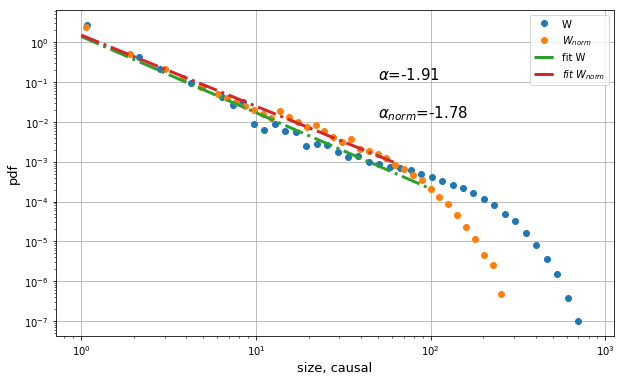

In [18]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,6))
plt.xscale('log')
plt.yscale('log')

tt = mod.pdf_size_causal[np.argmax(mod.S2)]
tt_norm = mod.pdf_size_causal_norm[np.argmax(mod.S2_norm)]

plt.plot(tt[0], tt[1], 'o', label='W')
plt.plot(tt_norm[0], tt_norm[1], 'o', label=r'$W_{norm}$')

# Fit causal
xmin = 0
xmax = 2.

x = np.log10(tt[0][tt[1]>0])
y = np.log10(tt[1][tt[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mW = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label='fit W', linewidth=3)

# Fit causal norm
xmin = 0
xmax = 1.8

x = np.log10(tt_norm[0][tt_norm[1]>0])
y = np.log10(tt_norm[1][tt_norm[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mWnorm = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label=r'$fit \ W_{norm}$', linewidth=3)

plt.text(50, 0.1, r'$\alpha$={:.2f}'.format(mW), fontsize=15, verticalalignment='bottom')
plt.text(50, 0.01, r'$\alpha_{{norm}}$={:.2f}'.format(mWnorm), fontsize=15, verticalalignment='bottom')

plt.xlabel('size, causal', size=13)
plt.ylabel('pdf', size=13)
plt.legend()
plt.grid()
plt.show()

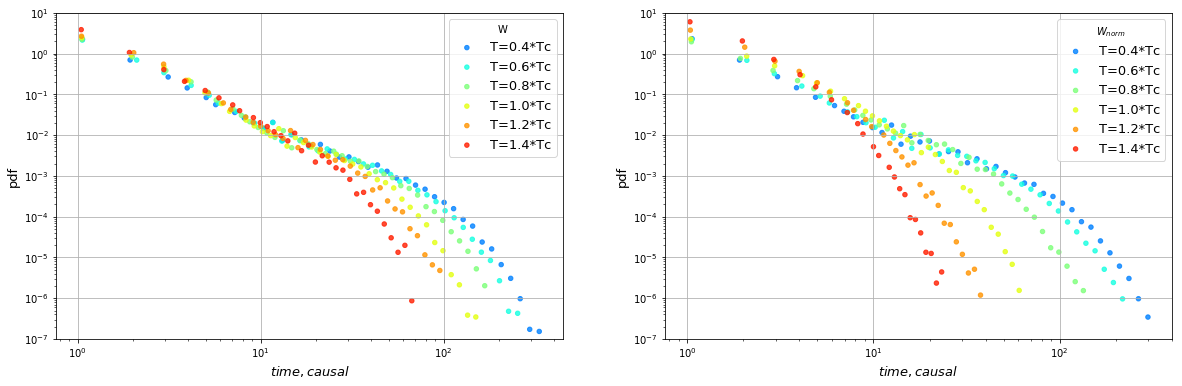

In [8]:
plotter.plot_pdf(mod, 'time_causal', Nbins=None, yrange=[1e-7, 1e1], scale='loglog')

-2.2425967401567592 0.5372374528188874
-1.951018891504402 0.5375220576481949


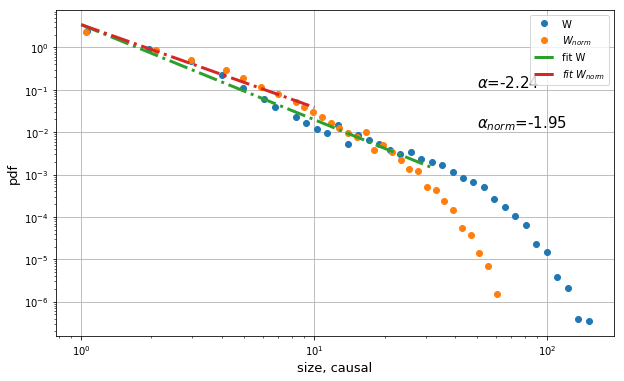

In [14]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,6))
plt.xscale('log')
plt.yscale('log')

tt = mod.pdf_time_causal[np.argmax(mod.S2)]
tt_norm = mod.pdf_time_causal_norm[np.argmax(mod.S2_norm)]

plt.plot(tt[0], tt[1], 'o', label='W')
plt.plot(tt_norm[0], tt_norm[1], 'o', label=r'$W_{norm}$')

# Fit causal
xmin = 0
xmax = 1.5

x = np.log10(tt[0][tt[1]>0])
y = np.log10(tt[1][tt[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mW = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label='fit W', linewidth=3)

# Fit causal norm
xmin = 0
xmax = 1.

x = np.log10(tt_norm[0][tt_norm[1]>0])
y = np.log10(tt_norm[1][tt_norm[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mWnorm = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label=r'$fit \ W_{norm}$', linewidth=3)

plt.text(50, 0.1, r'$\alpha$={:.2f}'.format(mW), fontsize=15, verticalalignment='bottom')
plt.text(50, 0.01, r'$\alpha_{{norm}}$={:.2f}'.format(mWnorm), fontsize=15, verticalalignment='bottom')

plt.xlabel('size, causal', size=13)
plt.ylabel('pdf', size=13)
plt.legend()
plt.grid()
plt.show()

# Dynamical range

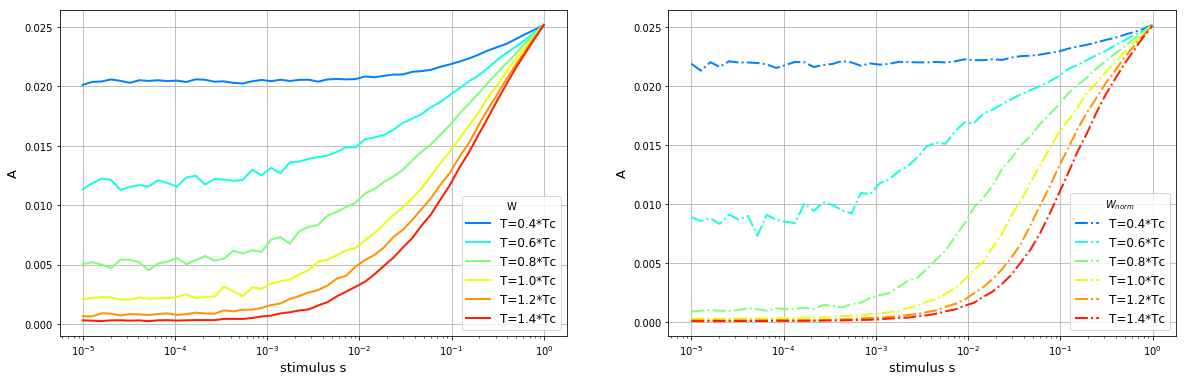

In [12]:
plotter.plot_stimulated(mod)

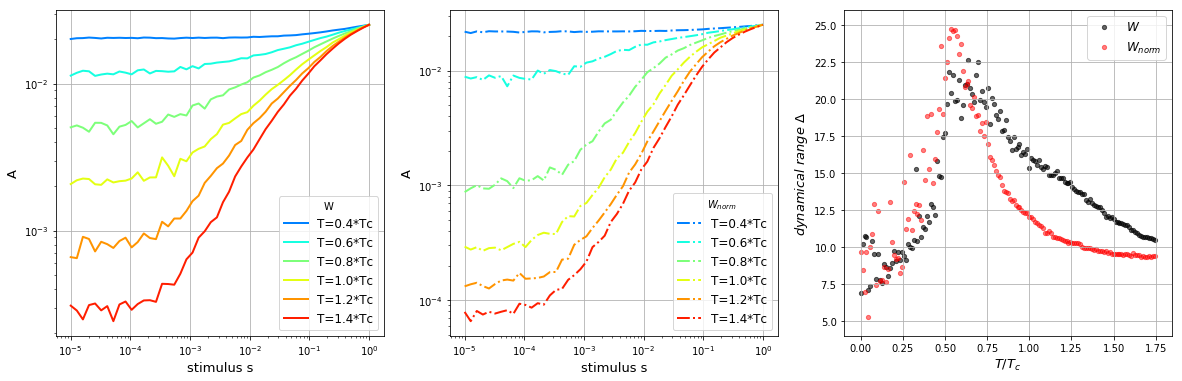

In [13]:
plotter.plot_dynamical_range(mod, low=0.2, high=0.8, ylim=[4, 26])

import matplotlib.pyplot as plt
import numpy as np

i = 0

Amax, Amin = np.max(mod.Exc_norm[i]), np.min(mod.Exc_norm[i])
A9 = 0.8*(Amax-Amin) + Amin
A1 =  0.2*(Amax-Amin) + Amin

plt.figure()
plt.xscale('log')
plt.plot(mod.stimuli, mod.Exc[i])
plt.axhline(A9)
plt.axhline(A1)
plt.show()

In [ ]:
folder = 'results/connectome_05/'
mod2 = HTC.loadFromName(folder+'connectome_66_0.0_1.5_0.01_50_0.73_0')

In [ ]:
import powerlaw

results = powerlaw.Fit(mod.pdf_size_causal[25])
print(results.power_law.alpha)
print(results.power_law.xmin)

In [ ]:
tt = 25

flat_list = [ [mod.pdf_size_causal[tt][0][i]] * mod.pdf_size[tt][1][i].astype(int) for i in range(len(mod.pdf_size[tt][0]))]
flat_list = [item for sublist in flat_list for item in sublist]

In [ ]:
len(flat_list)

In [ ]:
for tt in range(len(mod.Trange)):
    flat_list = [ [mod.pdf_size_causal[tt][0][i]] * mod.pdf_size_causal[tt][1][i].astype(int) for i in range(len(mod.pdf_size_causal[tt][0]))]
    flat_list = [item for sublist in flat_list for item in sublist]
    
    results = powerlaw.Fit(flat_list, xmin=1.)
    print('alpha:', results.power_law.alpha)
    print('xmin:', results.power_law.xmin)

In [ ]:
flat_list = [ [mod.pdf_size[tt][0][i]] * mod.pdf_size[tt][1][i].astype(int) for i in range(len(mod.pdf_size[tt][0]))]
flat_list = [item for sublist in flat_list for item in sublist]
    
results = powerlaw.Fit(flat_list)
print('alpha:', results.power_law.alpha)
print('xmin:', results.power_law.xmin)

In [ ]:
results.plot_pdf()
#results.power_law.plot_pdf(flat_list)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tt = np.argmax(mod.S2)
tt_norm = np.argmax(mod.S2_norm)

In [ ]:
x = mod.pdf_size_causal[tt][0]
y = mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1] )

x, y = x[y>0], y[y>0]

xmin = 1
xmax = 15

x, y = x[x>xmin], y[x>xmin]
x, y = x[x<xmax], y[x<xmax]

m, q = np.polyfit(x, np.log(y), 1)
print(m, q)

In [ ]:
x = mod.pdf_size_causal_norm[tt_norm][0]
y = mod.pdf_size_causal_norm[tt_norm][1] / sum(mod.pdf_size_causal_norm[tt_norm][1] )

x, y = x[y>0], y[y>0]

xmin = 1
xmax = 15

x, y = x[x>xmin], y[x>xmin]
x, y = x[x<xmax], y[x<xmax]

m_norm, q_norm = np.polyfit(x, np.log(y), 1)
print(m_norm, q_norm)

In [ ]:
#plt.xscale('log')
plt.yscale('log')

plt.plot(mod.pdf_size_causal[tt][0], mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1]), 'o')
plt.plot(mod.pdf_size_causal_norm[tt_norm][0], mod.pdf_size_causal_norm[tt_norm][1] / sum(mod.pdf_size_causal_norm[tt_norm][1]), 'o')

xx = np.arange(xmin, xmax)
plt.plot(xx, np.exp(m*xx + q))

plt.show()

In [ ]:
for tt in range(len(mod.Trange)):
    flat_list = [ [mod.pdf_size_causal_norm[tt][0][i]] * mod.pdf_size_causal_norm[tt][1][i].astype(int) for i in range(len(mod.pdf_size_causal_norm[tt][0]))]
    flat_list = [item for sublist in flat_list for item in sublist]
    
    results = powerlaw.Fit(flat_list)
    print('alpha:', results.power_law.alpha)
    print('xmin:', results.power_law.xmin)

In [ ]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tt = np.argmax(mod.S2)

flat_list = [ [mod.pdf_size_causal[tt][0][i]] * mod.pdf_size_causal[tt][1][i].astype(int) for i in range(len(mod.pdf_size_causal[tt][0]))]
flat_list = [item for sublist in flat_list for item in sublist]

In [ ]:
plt.xscale('log')
plt.yscale('log')

plt.plot(mod.pdf_size_causal[tt][0], mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1]), 'o')
plt.show()

In [ ]:
results = powerlaw.Fit(flat_list, xmin=15)
print('alpha', results.power_law.alpha)
print('xmin', results.power_law.xmin)

In [ ]:
fig2 = results.plot_pdf(color='b', linewidth=2)
results.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
results.plot_ccdf(color='r', linewidth=2, ax=fig2)
results.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
plt.show()

In [ ]:
exp_x = results.exponential.pdf()

In [ ]:
x, y = results.cdf()
print(x)

In [ ]:
x, y = results.pdf()
print(x)

In [ ]:
plt.xscale('log')
plt.yscale('log')
plt.plot(mod.pdf_size_causal[tt][0], mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1]), 'o')
plt.plot((x[1:]+x[:-1])/2, y, 'o')


plt.show()

In [ ]:
import networkx as nx
import numpy as np

In [ ]:
N = 60
k = 10

deg = []

for i in range(10000):

    random = nx.generators.random_graphs.erdos_renyi_graph(n=N, p=k/N)

    tmp = sum(x for i,x in random.degree) / N
    
    deg.append(tmp)
    
print(np.mean(deg), np.std(deg))

In [ ]:
N = 60
k = 10

m = 10

deg = []

for i in range(10000):

    random = nx.generators.random_graphs.barabasi_albert_graph(n=N, m=m)

    tmp = sum(x for i,x in random.degree) / N
    
    deg.append(tmp)
    
print(np.mean(deg), np.std(deg))

In [ ]:
km = (N-m) * m/N * 2
km

In [ ]:
m = ( N - np.sqrt(N**2 - 2*N*km) ) / 2
m